In [1]:
import pandas as pd

#### Dimensionality Reduction

In [2]:
og_data = pd.read_csv('Iris.csv')
data = og_data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
data = data.drop('Id', axis=1)

X = data.drop('Species', axis=1)
y = data['Species']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Species'] = y

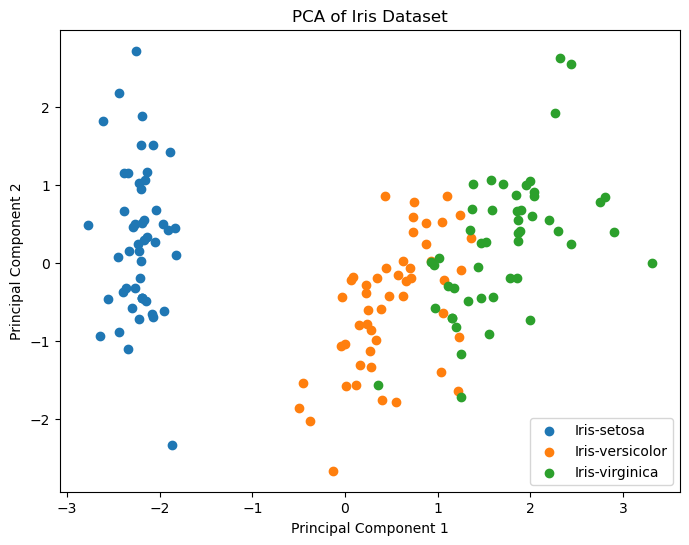

In [7]:
plt.figure(figsize=(8,6))
species = pca_df['Species'].unique()

for specie in species:
    subset = pca_df[pca_df['Species'] == specie]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], label=specie)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()

#### Stock price prediction using time series forecasting

In [8]:
og_data = pd.read_csv('IBM.csv')
data = og_data
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,129.063095,129.942642,128.843216,129.464630,105.346336,3293436
1,2020-01-03,127.695984,128.929260,127.686424,128.432129,104.506195,2482890
2,2020-01-06,127.552582,128.336517,127.342255,128.202682,104.319489,2537073
3,2020-01-07,127.810707,129.024857,127.533463,128.288712,104.389488,3232977
4,2020-01-08,128.594650,129.885284,128.030594,129.359467,105.260765,4545916


In [9]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [10]:
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
print("Missing values in each column:\n", data.isnull().sum())

data = data.dropna()

print("After handling, missing values:\n", data.isnull().sum())


Missing values in each column:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
After handling, missing values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [12]:
data.set_index('Date', inplace=True)
print(data.head())
print("\nIndex type:", type(data.index))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02  129.063095  129.942642  128.843216  129.464630  105.346336   
2020-01-03  127.695984  128.929260  127.686424  128.432129  104.506195   
2020-01-06  127.552582  128.336517  127.342255  128.202682  104.319489   
2020-01-07  127.810707  129.024857  127.533463  128.288712  104.389488   
2020-01-08  128.594650  129.885284  128.030594  129.359467  105.260765   

             Volume  
Date                 
2020-01-02  3293436  
2020-01-03  2482890  
2020-01-06  2537073  
2020-01-07  3232977  
2020-01-08  4545916  

Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


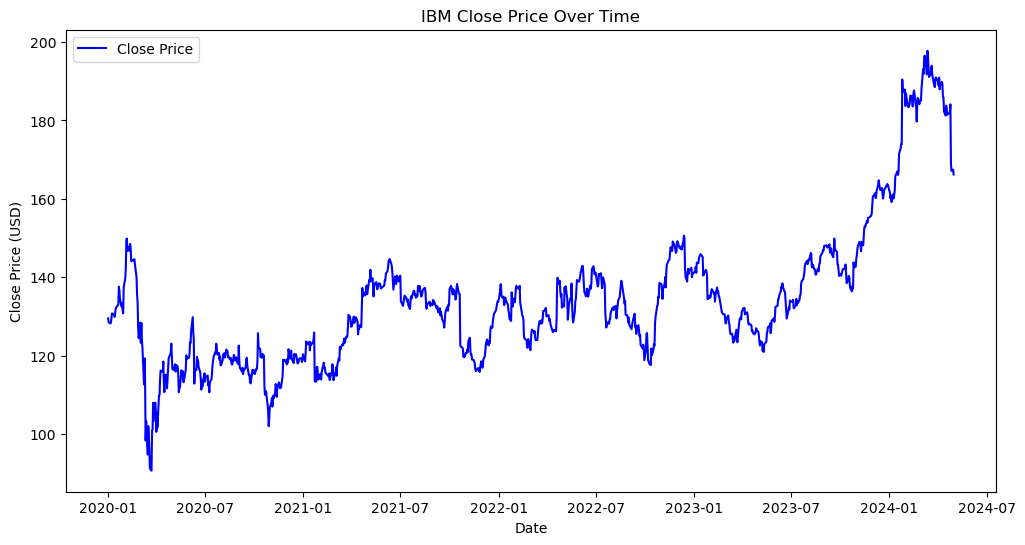

In [13]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title('IBM Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

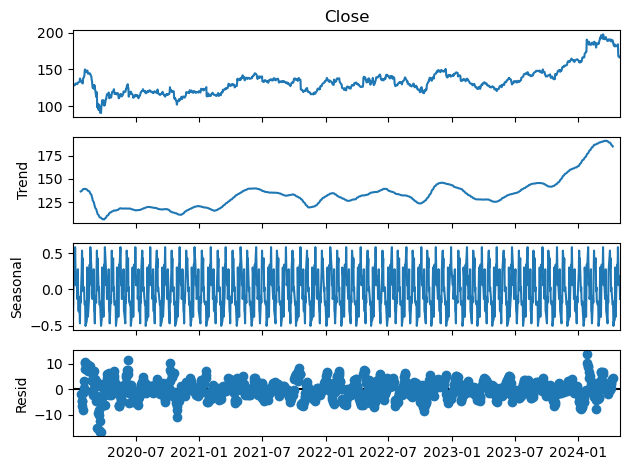

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Close'], model='additive', period=30)  # Assuming monthly seasonality

result.plot()
plt.show()

In [15]:
data['Close_Lag1'] = data['Close'].shift(1)

data['Close_Lag2'] = data['Close'].shift(2)

print(data[['Close', 'Close_Lag1', 'Close_Lag2']].head(10))


                 Close  Close_Lag1  Close_Lag2
Date                                          
2020-01-02  129.464630         NaN         NaN
2020-01-03  128.432129  129.464630         NaN
2020-01-06  128.202682  128.432129  129.464630
2020-01-07  128.288712  128.202682  128.432129
2020-01-08  129.359467  128.288712  128.202682
2020-01-09  130.726578  129.359467  128.288712
2020-01-10  130.678772  130.726578  129.359467
2020-01-13  130.592728  130.678772  130.726578
2020-01-14  129.847031  130.592728  130.678772
2020-01-15  130.611862  129.847031  130.592728


In [16]:
data['MA_7'] = data['Close'].rolling(window=7).mean()

data['MA_30'] = data['Close'].rolling(window=30).mean()

data['STD_7'] = data['Close'].rolling(window=7).std()

print(data[['Close', 'MA_7', 'MA_30', 'STD_7']].head(15))


                 Close        MA_7  MA_30     STD_7
Date                                               
2020-01-02  129.464630         NaN    NaN       NaN
2020-01-03  128.432129         NaN    NaN       NaN
2020-01-06  128.202682         NaN    NaN       NaN
2020-01-07  128.288712         NaN    NaN       NaN
2020-01-08  129.359467         NaN    NaN       NaN
2020-01-09  130.726578         NaN    NaN       NaN
2020-01-10  130.678772  129.307567    NaN  1.075979
2020-01-13  130.592728  129.468724    NaN  1.182621
2020-01-14  129.847031  129.670853    NaN  1.093477
2020-01-15  130.611862  130.015021    NaN  0.919688
2020-01-16  131.912048  130.532641    NaN  0.797707
2020-01-17  132.227539  130.942365    NaN  0.830586
2020-01-21  133.049713  131.274242    NaN  1.137438
2020-01-22  137.562134  132.257579    NaN  2.587693
2020-01-23  136.587006  133.113905    NaN  2.915936


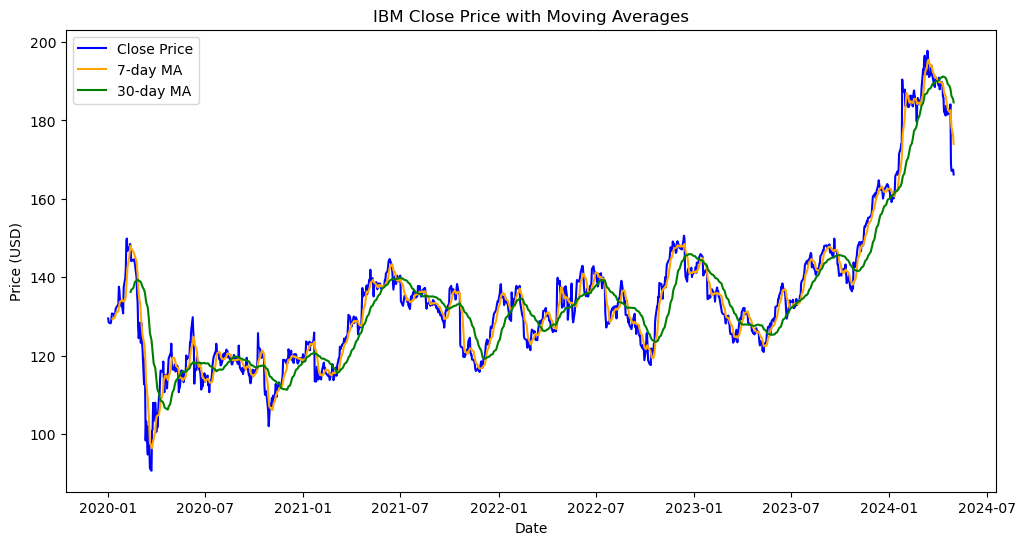

In [17]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['MA_7'], label='7-day MA', color='orange')
plt.plot(data['MA_30'], label='30-day MA', color='green')
plt.title('IBM Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
train_size = int(len(data) * 0.8)
train, test = data['Close'][:train_size], data['Close'][train_size:]
print(f"Training Size: {len(train)}, Test Size: {len(test)}")

Training Size: 871, Test Size: 218


In [20]:
# Auto ARIMA to identify optimal (p, d, q)
stepwise_fit = auto_arima(train, trace=True, suppress_warnings=True)

# Optimal parameters
print("Optimal (p,d,q):", stepwise_fit.order)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3837.467, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3863.635, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3863.743, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3863.881, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3861.650, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3858.701, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3866.317, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3839.368, Time=0.79 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3869.261, Time=0.71 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3864.933, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3867.590, Time=0.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3867.923, Time=0.35 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3836.011, Time=1.39 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=3843.367, Time=1.44 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept

In [21]:
import warnings
warnings.filterwarnings('ignore')
p, d, q = stepwise_fit.order
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  871
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1909.425
Date:                Sat, 15 Mar 2025   AIC                           3832.851
Time:                        15:15:09   BIC                           3866.230
Sample:                             0   HQIC                          3845.623
                                - 871                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8618      0.023    -37.475      0.000      -0.907      -0.817
ar.L2          0.8328      0.018     46.616      0.000       0.798       0.868
ar.L3          0.9367      0.020     46.962      0.0

In [22]:
forecast_obj = model_fit.get_forecast(steps=len(test))

forecast_mean = forecast_obj.predicted_mean

forecast = pd.Series(forecast_mean.values, index=test.index)

print(forecast.head())


Date
2023-06-20    137.521855
2023-06-21    137.372809
2023-06-22    137.181635
2023-06-23    137.261475
2023-06-26    136.893854
dtype: float64


In [23]:
print("NaNs in test:", test.isna().sum())
print("NaNs in forecast:", pd.Series(forecast).isna().sum())

NaNs in test: 0
NaNs in forecast: 0


In [24]:
print("Length of test:", len(test))
print("Length of forecast:", len(forecast))

Length of test: 218
Length of forecast: 218


In [25]:
print("Forecast shape:", forecast.shape)
print("Test shape:", test.shape)

print("Forecast index range:", forecast.index.min(), "to", forecast.index.max())
print("Test index range:", test.index.min(), "to", test.index.max())

Forecast shape: (218,)
Test shape: (218,)
Forecast index range: 2023-06-20 00:00:00 to 2024-04-30 00:00:00
Test index range: 2023-06-20 00:00:00 to 2024-04-30 00:00:00


In [26]:
forecast_aligned = forecast.loc[test.index]  # Ensure forecast has same dates as test

forecast_clean = forecast_aligned.dropna()
test_clean = test.loc[forecast_clean.index]  # Align test to the cleaned forecast

In [28]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# MAE
mae = mean_absolute_error(test_clean, forecast_clean)
# RMSE
rmse = np.sqrt(mean_squared_error(test_clean, forecast_clean))
# MAPE
mape = np.mean(np.abs((test_clean - forecast_clean) / test_clean)) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")

MAE: 26.591240108850865
RMSE: 33.397611195929635
MAPE: 15.36%
